# Who didn't vote in 2020? 

This is an analysis of data collected from Americans by Ipsos for FiveThirtyEight. The survey collected information on respondents' voting behavior, demographic information and their views on a number of different issues. 

The poll was conducted from September 15 to September 25, 2020 among a sample of 5,239 U.S. citizens that oversampled young, Black and Hispanic respondents. It also includes a higher percentage of respondents who described themselves as voting “rarely” or “never” so as to avoid underrepresenting nonvoters. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



In [56]:
df = pd.read_csv('nonvoters_data.csv')

# Clean up data by renaming columns. 
df = df.drop(['Q1'], axis=1)
#df = df.rename(columns={"ppage":"age"})

# Create first dataframe on the second question.

question_two = df.loc[:,["Q2_1","Q2_2","Q2_3","Q2_4","Q2_5","Q2_6",
                         "Q2_7","Q2_8","Q2_9","Q2_10","voter_category","gender","ppage"]]

question_two = question_two.rename(columns={"Q2_1":"imp-voting",
"Q2_2":"imp-jury-duty",
"Q2_3":"knowing-happenings",
"Q2_4":"display-flag",
"Q2_5":"census-partcip",
"Q2_6":"pledge-alleg",
"Q2_7":"military-support",
"Q2_8":"respect-opinion",
"Q2_9":"believe-god",
"Q2_10":"protest-govt-wrong"})


# Create second dataframe on the third question.
question_three = df.loc[:,["Q3_1","Q3_2","ppage","race","voter_category"]]

question_three = question_three.rename(columns={"Q3_1": "racism_us","Q3_2": "racism_policing"})

# Create third dataframe on the fourth question.

question_four = df.loc[:,["Q4_1","Q4_2","Q4_3","Q4_4","Q4_5","Q4_6","income_cat","race","voter_category"]]

question_four = question_four.rename(columns={"Q4_1": "dc_elected_officials",
"Q4_2": "state_elected_officials",
"Q4_3": "city_elected_officials",
"Q4_4": "news_media",
"Q4_5": "wall_street",
"Q4_6": "law_enforcement"})

# Create fourth dataframe on the sixth question

question_six = df.loc[:,["Q6","race","gender","voter_category"]]


## Being a good American <a class="anchor" id="first-bullet"></a>


### In your view, how important are each of the following to being a good American?


1. Voting in elections 
2. Supporting the military
3. Believing in God
4. Protesting if you believe government actions are wrong


**Responses**

1. Very important
2. Somewhat important
3. Not so important
4. Not at all important
  

/var/folders/m7/pr2047y173x50c8xddxm6ndr0000gn/T/ipykernel_29897/25921996.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  question_two.median().sort_values()


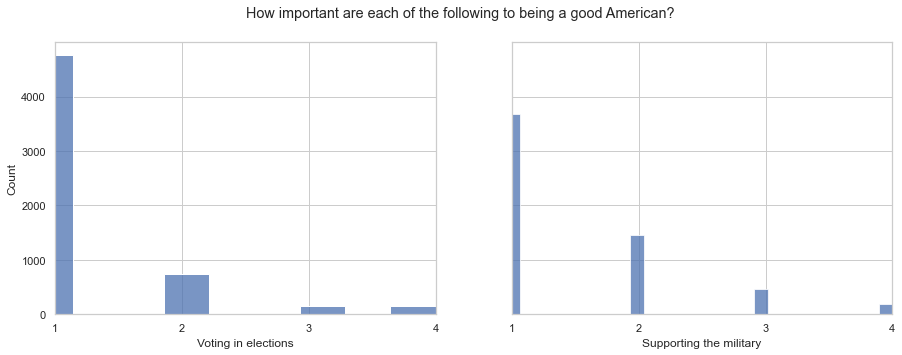

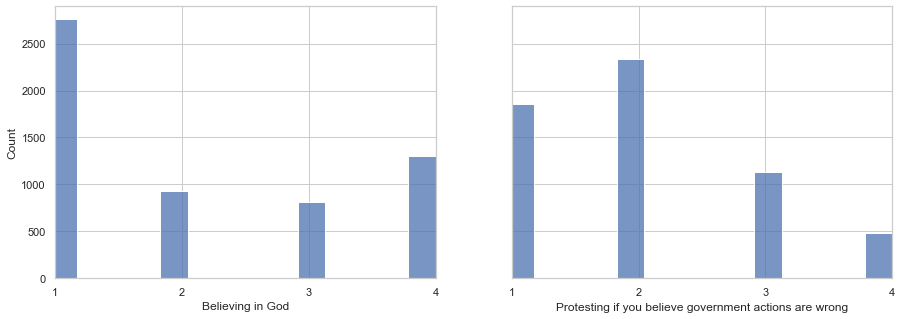

In [64]:
sns.set(style="whitegrid")
question_two.median().sort_values()

cols =["imp-voting","military-support","believe-god","protest-govt-wrong"]

x_axis_values = ["Voting in elections","Supporting the military","Believing in God",
                 "Protesting if you believe government actions are wrong"]

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('How important are each of the following to being a good American?')


counter = 0 

for i,v in zip(cols[:2],x_axis_values[:2]):
    graph = sns.histplot(ax = axes[counter], data=question_two, x = i)
    graph.set_xlim(1,4)
    graph.set_xticks(range(1,5))
    title = v
    graph.set_xlabel(v)
    counter = counter + 1

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

counter = 0 
for i,v in zip(cols[2:],x_axis_values[2:]):
    graph = sns.histplot(ax = axes[counter], data=question_two, x = i)
    graph.set_xlim(1,4)
    graph.set_xticks(range(1,5))
    title = v
    graph.set_xlabel(v)
    counter = counter + 1



### Analysis on being a good American

Respondents' beliefs on what is important to being a good American are split. 

81.52 percent of respondents believed that voting in elections was very important- the highest percentage of respondents for the questions included in this analysis. 

Less respondents believed that supporting the military was very important to being a good American: 63.12 percent. 

47.25 percent thought that believing in God was very important to being a good American and 22.29 percent strongly disagreed with this statement (the highest percentage of respondents who strongly disagreed with any of the questions). This indicates that respondents value the separation between church and state. 

Finally, only 31.76 percent of respondents thought that protesting was very important. This was the question with the highest percentage of respondents answering "Somewhat important" or "Not so important", indicating that respondents have a more centrist view towards protesting and don't see it as a strong sign of patriotism.

## Systematic racism <a class="anchor" id="second-bullet"></a>

### How much do you agree or disagree with the following statements?

1. Systemic racism is a problem in the United States.
2. Systemic racism in policing is a bigger problem than violence and vandalism in protests.


**Responses**

1. Strongly agree
2. Somewhat agree
3. Somewhat disagree
4. Strongly disagree


/var/folders/m7/pr2047y173x50c8xddxm6ndr0000gn/T/ipykernel_29897/1731532107.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  question_three.median().sort_values()


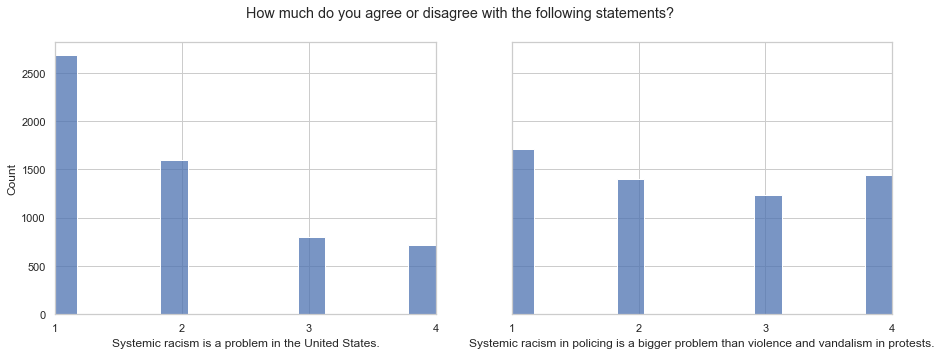

In [62]:
question_three.median().sort_values()

cols =["racism_us","racism_policing"]

x_axis_values = ["Systemic racism is a problem in the United States.",
                 "Systemic racism in policing is a bigger problem than violence and vandalism in protests."]

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('How much do you agree or disagree with the following statements?')

counter = 0 
for i,v in zip(cols,x_axis_values):
    graph = sns.histplot(ax = axes[counter], data=question_three, x = i)
    graph.set_xlim(1,4)
    graph.set_xticks(range(1,5))
    title = v
    graph.set_xlabel(v)
    counter = counter + 1
    


### Analysis on systematic racism

The answers to these two questions indicate that respondents agree that systematic racism is a problem in the U.S. but do not believe systematic racism in policing is the biggest problem the country is facing. 

45.95 percent strongly agree that systematic racism is a problem in the U.S. In contrast, only 29.26 percent strongly agree that systemic racism in policing is a bigger problem than violence and vandalism in protests.

We can see that the majority of respondents believe that racism is a problem (answered either strongly agree or agree) but the responses for the second question are fairly divided.

Another reason for this variance is that respondents didn't understand the question asking them to compare systematic racism in policing to vandalism and violence in protests. Perhaps respondents weren't sure how to quantify the issue or were considering the rise in violent white supremacy, particularly under the Trump administration.  


## Institutions and elected officials <a class="anchor" id="third-bullet"></a>

### How much of an impact, if any, do each of the following have on your life?

1. Elected officials in Washington, D.C. (e.g. the president, member of Congress).
2. The news media.
3. Large financial institutions on Wall Street.
4. Law enforcement and the legal system.

**Responses**
1. A significant impact
2. Somewhat of an impact
3. Just a slight impact
4. No impact at all


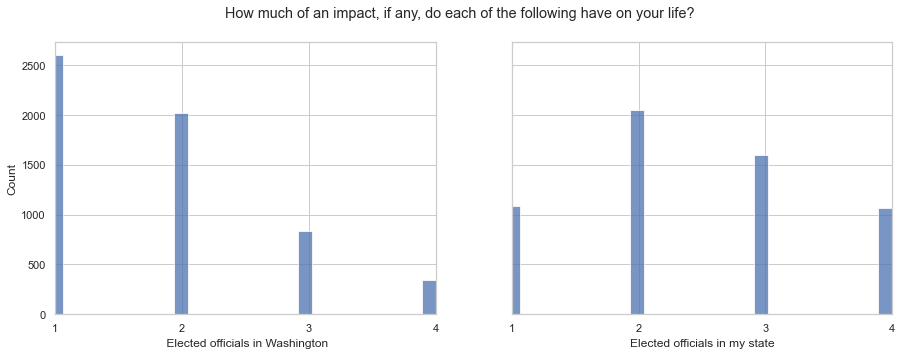

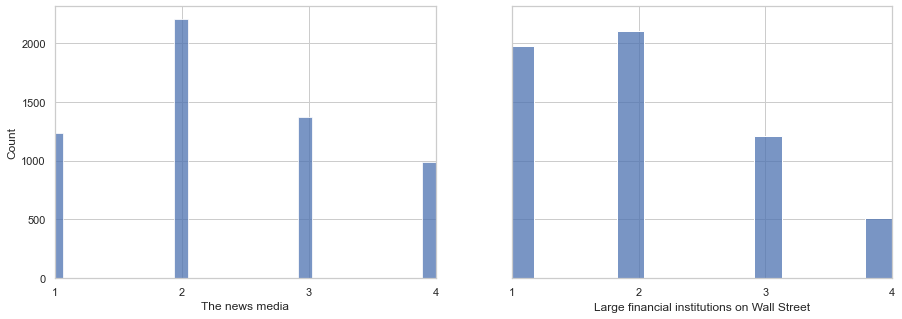

In [66]:
cols = ["dc_elected_officials",
        "news_media","wall_street", "law_enforcement"]

x_axis_values = [" Elected officials in Washington","Elected officials in my state",
                "The news media", 
                 "Large financial institutions on Wall Street",
                 "Law enforcement and the legal system"]

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('How much of an impact, if any, do each of the following have on your life?')


counter = 0 
for i,v in zip(cols[:2],x_axis_values[:2]):
    graph = sns.histplot(ax = axes[counter], data=question_four, x = i)
    graph.set_xlim(1,4)
    graph.set_xticks(range(1,5))
    title = v
    graph.set_xlabel(v)
    counter = counter + 1
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

counter = 0 

for i,v in zip(cols[2:],x_axis_values[2:]):
    graph = sns.histplot(ax = axes[counter], data=question_four, x = i)
    graph.set_xlim(1,4)
    graph.set_xticks(range(1,5))
    title = v
    graph.set_xlabel(v)
    counter = counter + 1
    


### Analysis on institutions and elected officials

Overall, respondents believed that the elected officials and institutions included in this analysis had an impact on their lives but the perceived extent of that impact varied. 

44.48 percent, the highest percentage of respondents, thought that elected officials in Washington had a significant impact on their lives. Large financial institutions were also perceived as influential: 33.77 percent believed Wall Street had a significant impact and 37.71 percent believed it had somewhat of an impact.

Respondents' perception of state elected officials and the news media was more moderate. The majority of respondents responded that these institutions had somewhat or just slightly of an impact.


## Representation in public office <a class="anchor" id="fourth-bullet"></a>

### In general, how many of the people in elected office today are like you?

**Responses**
1. Alot 
2. Some
3. Only a few
4. None

/var/folders/m7/pr2047y173x50c8xddxm6ndr0000gn/T/ipykernel_29897/3268357612.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  question_six.median().sort_values()


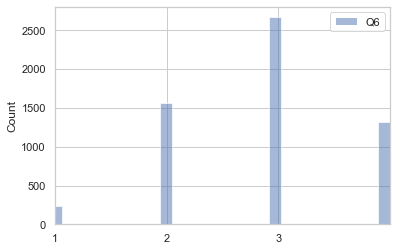

In [36]:
question_six.median().sort_values()

fig, ax = plt.subplots()
sns.histplot(data=question_six, ax=ax)
ax.set_xlim(1,4)
ax.set_xticks(range(1,4))
plt.show()



### Analysis on representation in public office

45.73 percent of respondents thought only a few people elected in public office look like them and only 0.03 percent thought a lot look like them.

These answers could indicate that the population sample (which included more people of color) do not feel represented in public office. As the demographics of the U.S. change, this sentiment could continue to increase unless more people are elected who are similar to the individuals they serve. 
